In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import joblib
from sklearn.model_selection import train_test_split
import shap
import seaborn as sns
print(sns.__version__)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


0.13.2


In [3]:
df = pd.read_excel("E:\loan_defaults.xls",header=1)

In [4]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [5]:
df.shape

(30000, 25)

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [10]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='default payment next month', ylabel='count'>

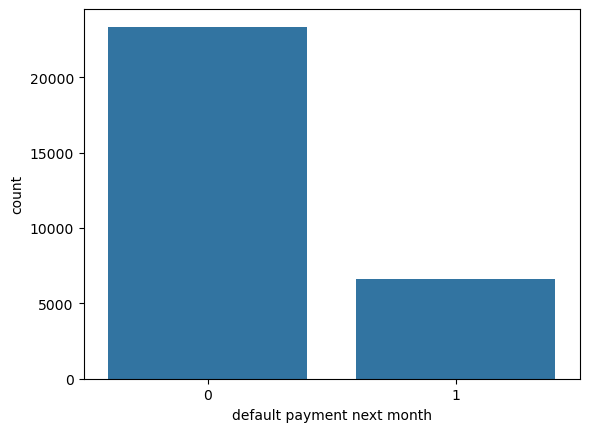

In [11]:
sns.countplot(x='default payment next month', data=df)


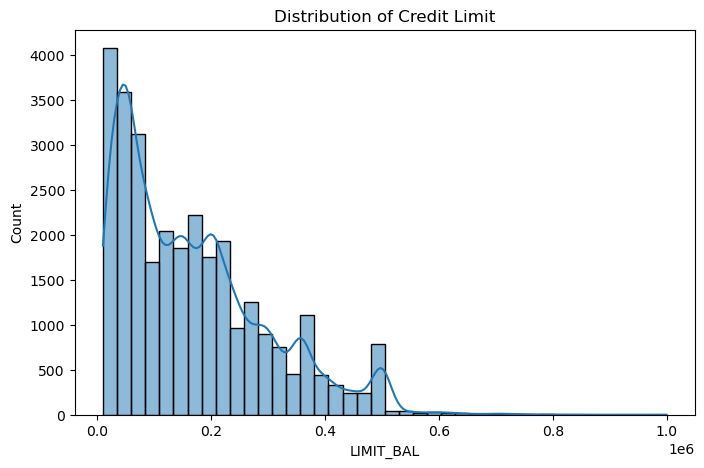

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['LIMIT_BAL'], kde=True, bins=40)
plt.title("Distribution of Credit Limit")
plt.show()

In [13]:
print(list(df.columns))

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [14]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='default payment next month', ylabel='count'>

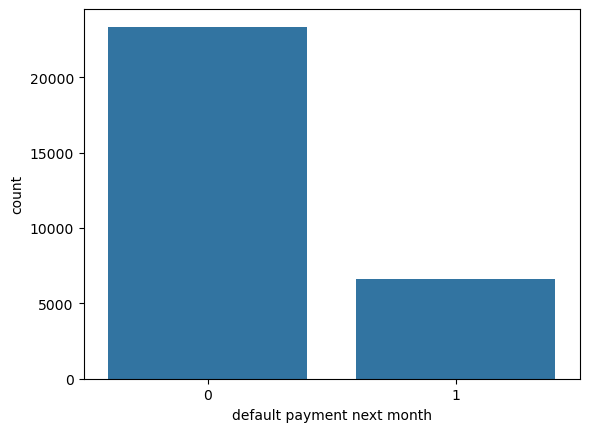

In [15]:
sns.countplot(x='default payment next month', data=df)

In [16]:
df.rename(columns={'default payment next month': 'Y'}, inplace=True)

In [17]:
X = df.drop(columns=['Y', 'ID'])
y = df['Y']

In [18]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = [...]

In [19]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(...)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [23]:
y_pred_lr = log_reg.predict(X_test)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

accuracy_score(y_test, y_pred_lr)

0.5475

In [24]:
classification_report(y_test, y_pred_lr)

'              precision    recall  f1-score   support\n\n           0       0.86      0.50      0.63      4673\n           1       0.29      0.70      0.41      1327\n\n    accuracy                           0.55      6000\n   macro avg       0.57      0.60      0.52      6000\nweighted avg       0.73      0.55      0.58      6000\n'

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [26]:
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8148333333333333

In [27]:
classification_report(y_test, y_pred_rf)


'              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      4673\n           1       0.65      0.35      0.45      1327\n\n    accuracy                           0.81      6000\n   macro avg       0.74      0.65      0.67      6000\nweighted avg       0.80      0.81      0.79      6000\n'

In [28]:
results = {
    "Logistic Regression Accuracy": accuracy_score(y_test, y_pred_lr),
    "Random Forest Accuracy": accuracy_score(y_test, y_pred_rf)
}

results


{'Logistic Regression Accuracy': 0.5475,
 'Random Forest Accuracy': 0.8148333333333333}

#### Phase 4

In [29]:
import shap
import numpy as np

In [30]:
# rf is already trained
# X_test already exists

In [31]:
explainer = shap.TreeExplainer(rf)

#### Global Explanation

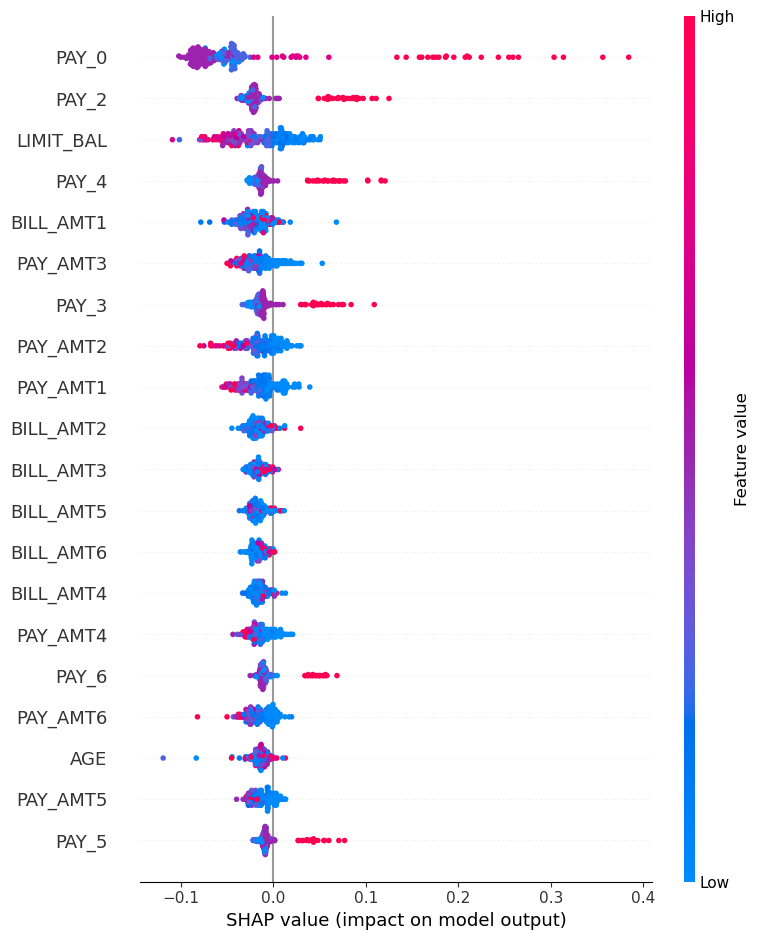

In [32]:
X_test_sample = X_test.sample(200, random_state=42)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_sample)

shap.summary_plot(shap_values[1], X_test_sample)

#### Local Explanation (One Customer Decision)

In [35]:
# Pick one test instance
i = 0
single_instance = X_test_sample.iloc[i]

# SHAP force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][i],
    single_instance
)


#### Feature Importance Bar Plot

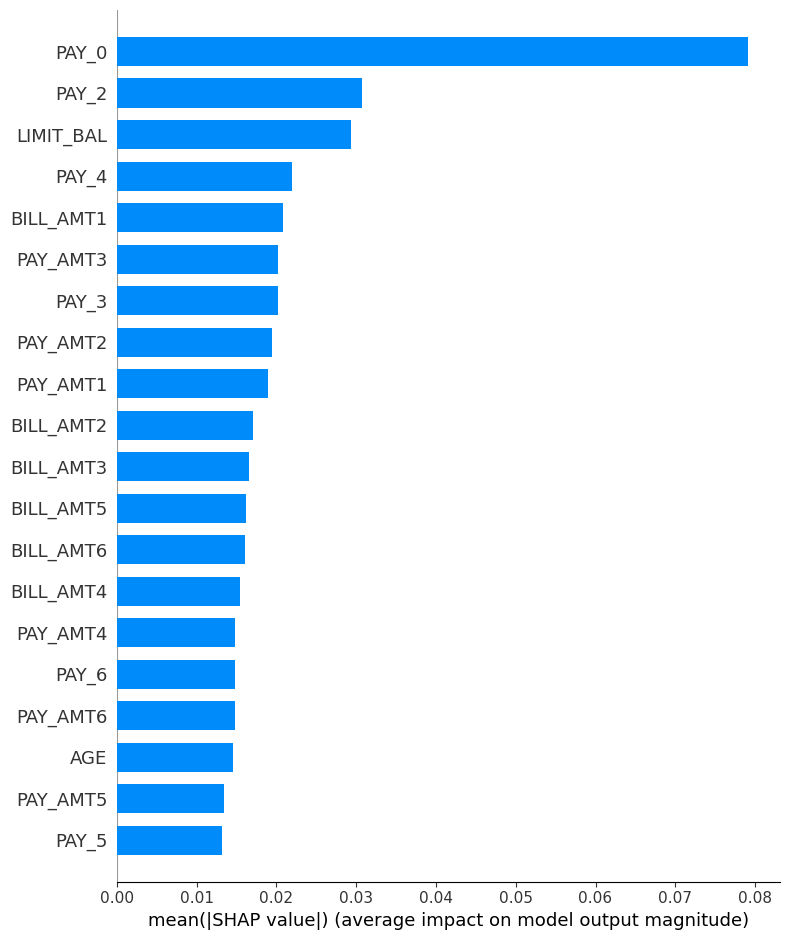

In [36]:
shap.summary_plot(
    shap_values[1],
    X_test_sample,
    plot_type="bar"
)

#### LIME (Local Explainability)

In [44]:
import sys
!{sys.executable} -m pip install lime

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached imageio-2.37.2-py3-none-any.whl.metadata (9.7 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 5.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.8 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.8 MB 6.6 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.8 MB 6.8 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.8 MB 6.4 MB/s eta 0:00:01
   ----------------------- -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [45]:
from lime.lime_tabular import LimeTabularExplainer

explainer_lime = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Default', 'Default'],
    mode='classification'
)

exp = explainer_lime.explain_instance(
    X_test.iloc[0].values,
    rf.predict_proba,
    num_features=10
)

exp.show_in_notebook()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [47]:
exp.show_in_notebook()

#### LIME for Non-Default Customer

In [48]:
# Pick a non-default case
idx = y_test[y_test == 0].index[0]

exp2 = explainer_lime.explain_instance(
    X_test.loc[idx].values,
    rf.predict_proba,
    num_features=10
)

exp2.show_in_notebook()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


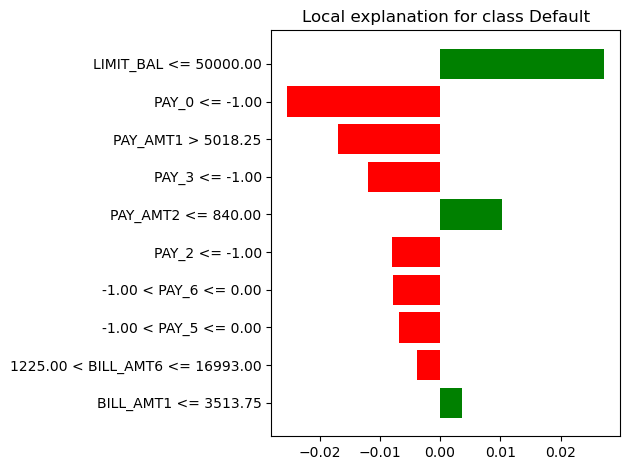

In [49]:
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.savefig("lime_default_example.png", dpi=300)
plt.show()

In [53]:
import joblib

joblib.dump(rf, "D:/Project/loan-default-xai/models/random_forest_model.pkl")
joblib.dump(X_train.columns.tolist(), "D:/Project/loan-default-xai/models/feature_names.pkl")


['D:/Project/loan-default-xai/models/feature_names.pkl']